## Introduction

In this notebook, we are going to analyze and build machine learning model to predict house/property sale prices in Ames, Iowa. Full description of this competition project can be seen at https://www.kaggle.com/c/house-prices-advanced-regression-techniques. The given dataset consists of several information (80 in total) which might be related to the property sales, e.g. lot area size, shape of property, number of bedroom, roof material etc. 

The aim of this project is to build a model which can predict the property sale prices based on the given information about the property. The property prices can take any positive values (continuous value), hence we are dealing with regression problem. We can also find the factor(s) which mostly affect the property prices.

## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment',None)
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Download dataset from shared google drive file.

In [2]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd
import os
gdd.download_file_from_google_drive(file_id='1BHS-gHNATkz3lANtoECrHB0d-ZeL5fEh',
                                    dest_path='./Ames.zip',
                                    unzip=True)

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Unzipping...Done.


In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Total 80 features from the dataset can be classified into nominal, ordinal, and numeric variables (can be checked in http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

Nominal features: Id (primary key), MSSubClass, MSZoning, Street, Alley, LandContour, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, GarageType, MiscFeature, SaleType, SaleCondition

Ordinal features: LotShape, Utilities, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond,  BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

Discrete numeric features: YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, MoSold, YrSold

Continuous numeric features: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice

## Handling Missing Values

### So many NA values...

In [3]:
nas = df.isna().sum()
nas[nas>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

The NA values in this data are quite massive. For instance, Alley and PoolQC columns have 1369 NA values (more than 90% of the records). Nevertheless, do not drop these columns. NA values in several columns simply means that the property doesn't have the mentioned attribute (check the data description): 
- NA value in Alley &#8594; the property has no alley access
- NA value in PoolQC &#8594; the property has no pool
- and so on...

We can simply replace the NA values in several columns by new categorical value 'None'. These columns are: Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature. 

Exception:
- One house has unfinished basement (which means it has a basement) but NA value of exposure (which means it has no basement) &#8594; contradictive, deal with that later.
- One house has NA value in BsmtFinType2 (which means it has no basement) but other features show that it has a basement &#8594; contradictive, deal with that later.
- GarageYrBlt is actually a numerical feature, but it has NA values (which means no garage), so it must be filled with numerical values too &#8594; deal with that later.

In [3]:
cols = ['Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
df[cols] = df[cols].fillna('None')

### Confusing data about basement

One house has unfinished basement (which means it has a basement) but NA value of exposure (which means it has no basement).

In [4]:
df[(df['BsmtExposure'].isna()) & (df['TotalBsmtSF']>0)].iloc[:,30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
948,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA


One house has NA value in BsmtFinType2 (which means it has no basement) but other features show that it has a basement.

In [5]:
df[(df['BsmtFinType2'].isna()) & (df['TotalBsmtSF']>0)].iloc[:,30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA


Solution based on naive assumption:
- Typo when inputing NA value in BsmtExposure &#8594; replace with 'No' (no basement exposure).
- Typo when inputing NA value in BsmtFinType2 &#8594; replace with 'Unf' (basement unfinished).

In [4]:
df.loc[(df['BsmtExposure'].isna()) & (df['TotalBsmtSF']>0),'BsmtExposure'] = 'No'
df.loc[(df['BsmtFinType2'].isna()) & (df['TotalBsmtSF']>0),'BsmtFinType2'] = 'Unf'
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[cols] = df[cols].fillna('None')

In [6]:
nas = df.isna().sum()
nas[nas>0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

The remaining NA values will be dealt in the later section.

## Exploratory Data Analysis (EDA)

### Sale price dependence on nominal features

First, we will examine the relation between the property sale price with all of the nominal features by using boxplot. The purpose of this plotting routine is to find several variables which might affect the sale price significantly.

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

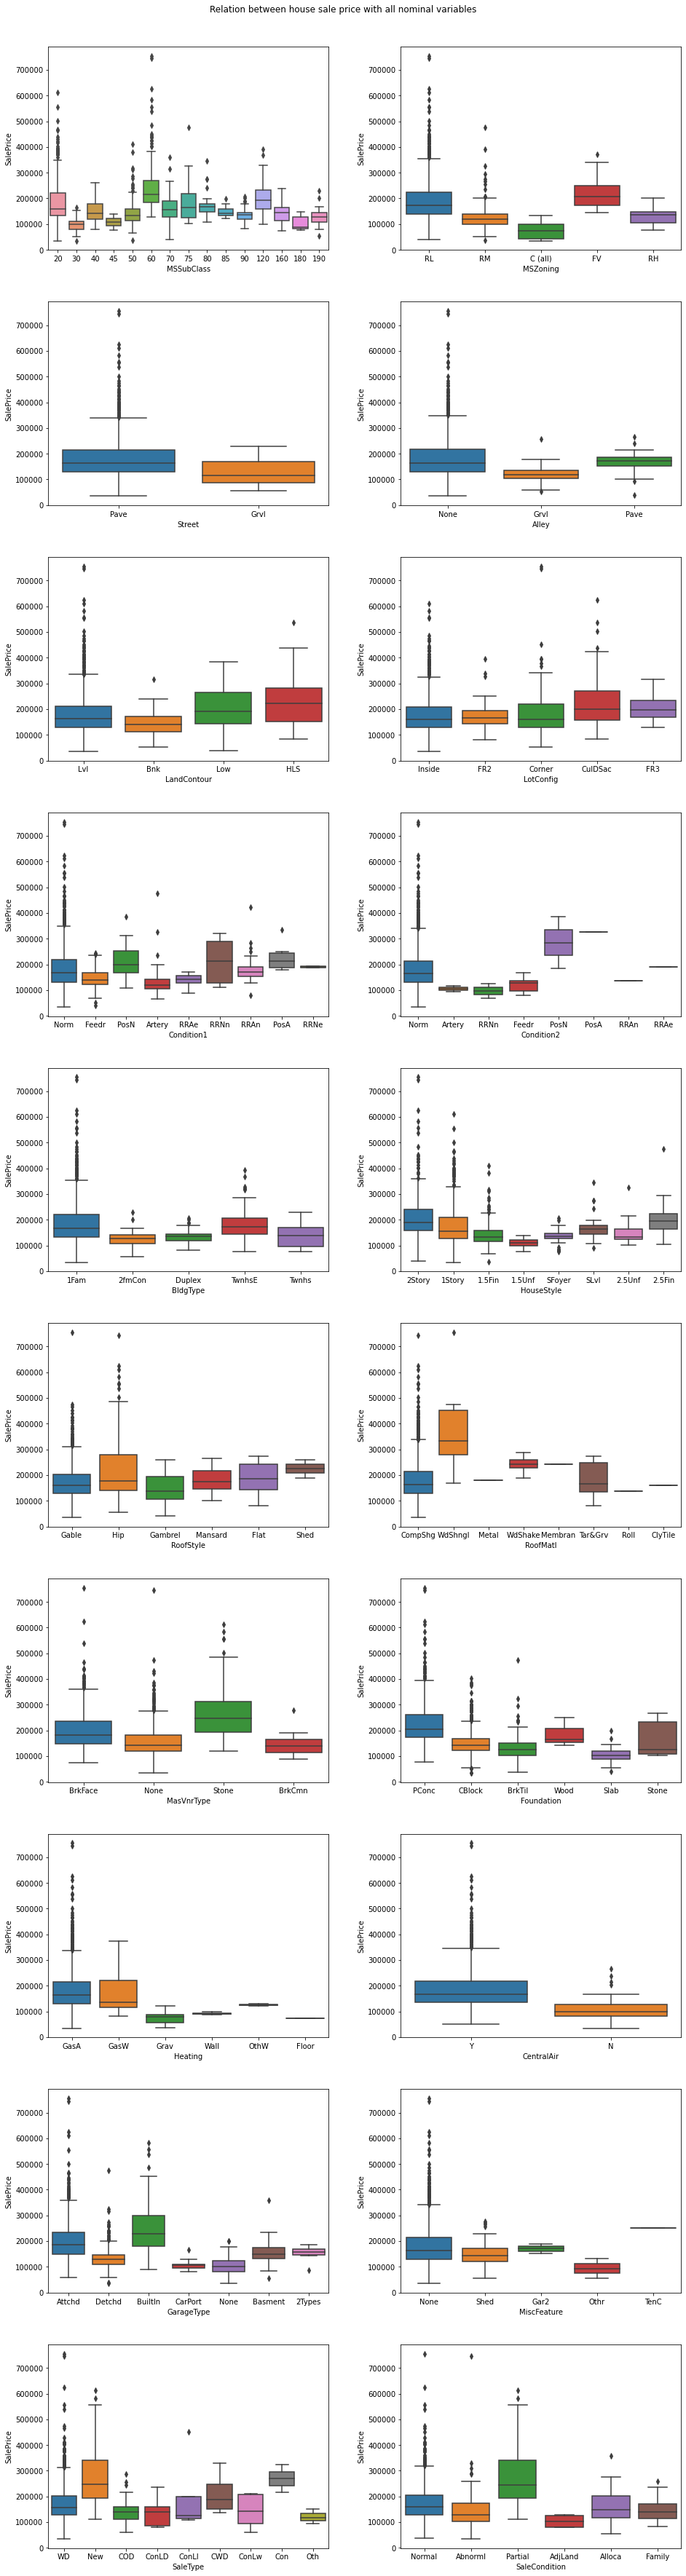

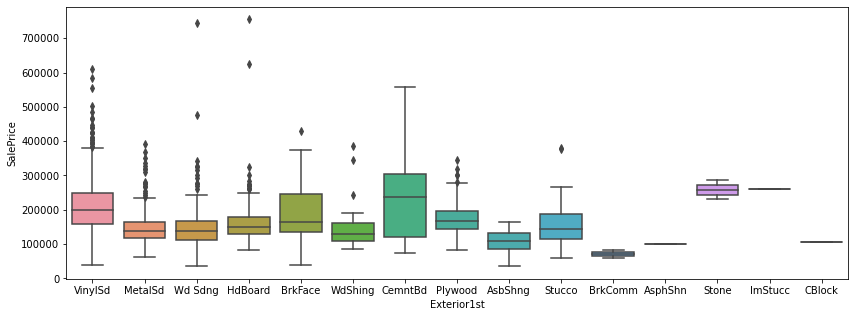

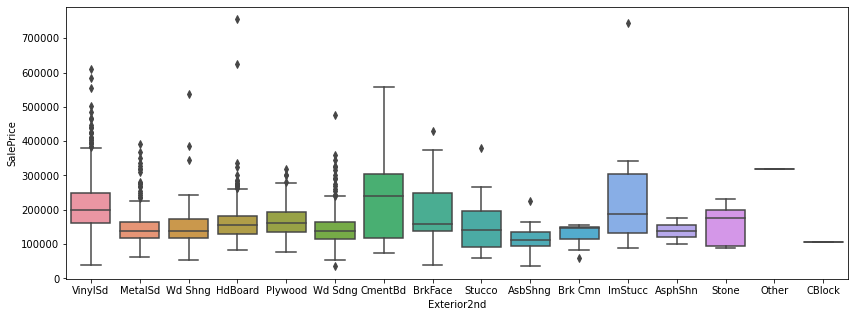

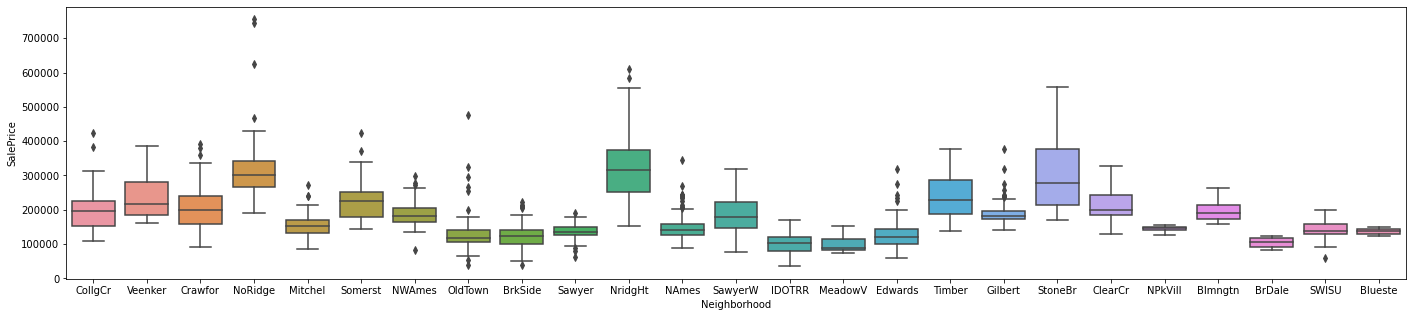

In [8]:
cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 
        'MiscFeature', 'SaleType', 'SaleCondition']
fig = plt.figure(figsize=(14,50))
for c,i in zip(cols, range(1,21)):
    ax = fig.add_subplot(10,2,i)
    sns.boxplot(x=c,y='SalePrice',data=df)
fig.suptitle('Relation between house sale price with all nominal variables',y=0.99)
fig.tight_layout(pad=4.0)
plt.figure(figsize=(14,5))
sns.boxplot(x='Exterior1st',y='SalePrice',data=df)
plt.figure(figsize=(14,5))
sns.boxplot(x='Exterior2nd',y='SalePrice',data=df)
plt.figure(figsize=(24,5))
sns.boxplot(x='Neighborhood',y='SalePrice',data=df)

Several remarks:
- Properties with paved road and alley access are more expensive than the gravel ones.
- Most of the properties have no alley access.
- It seems that properties with hillside slope tend to have higher sale price.
- Properties with hip and wood shingles roof tend to have higher sale price.
- Properties with stone masonry veneer tend to have higher sale price.
- Most of the properties have GasA heating type (gas forced warm air furnace).
- Properties which have central air conditioning are more expensive.
- Most of the properties have no miscellaneous (i.e. only one property has a tennis court).
- Properties which just constructed and sold tend to have higher sale price.

### Sale price dependence on ordinal features

Next, we will examine the relation between the property sale price with all of the ordinal features, also using boxplot.

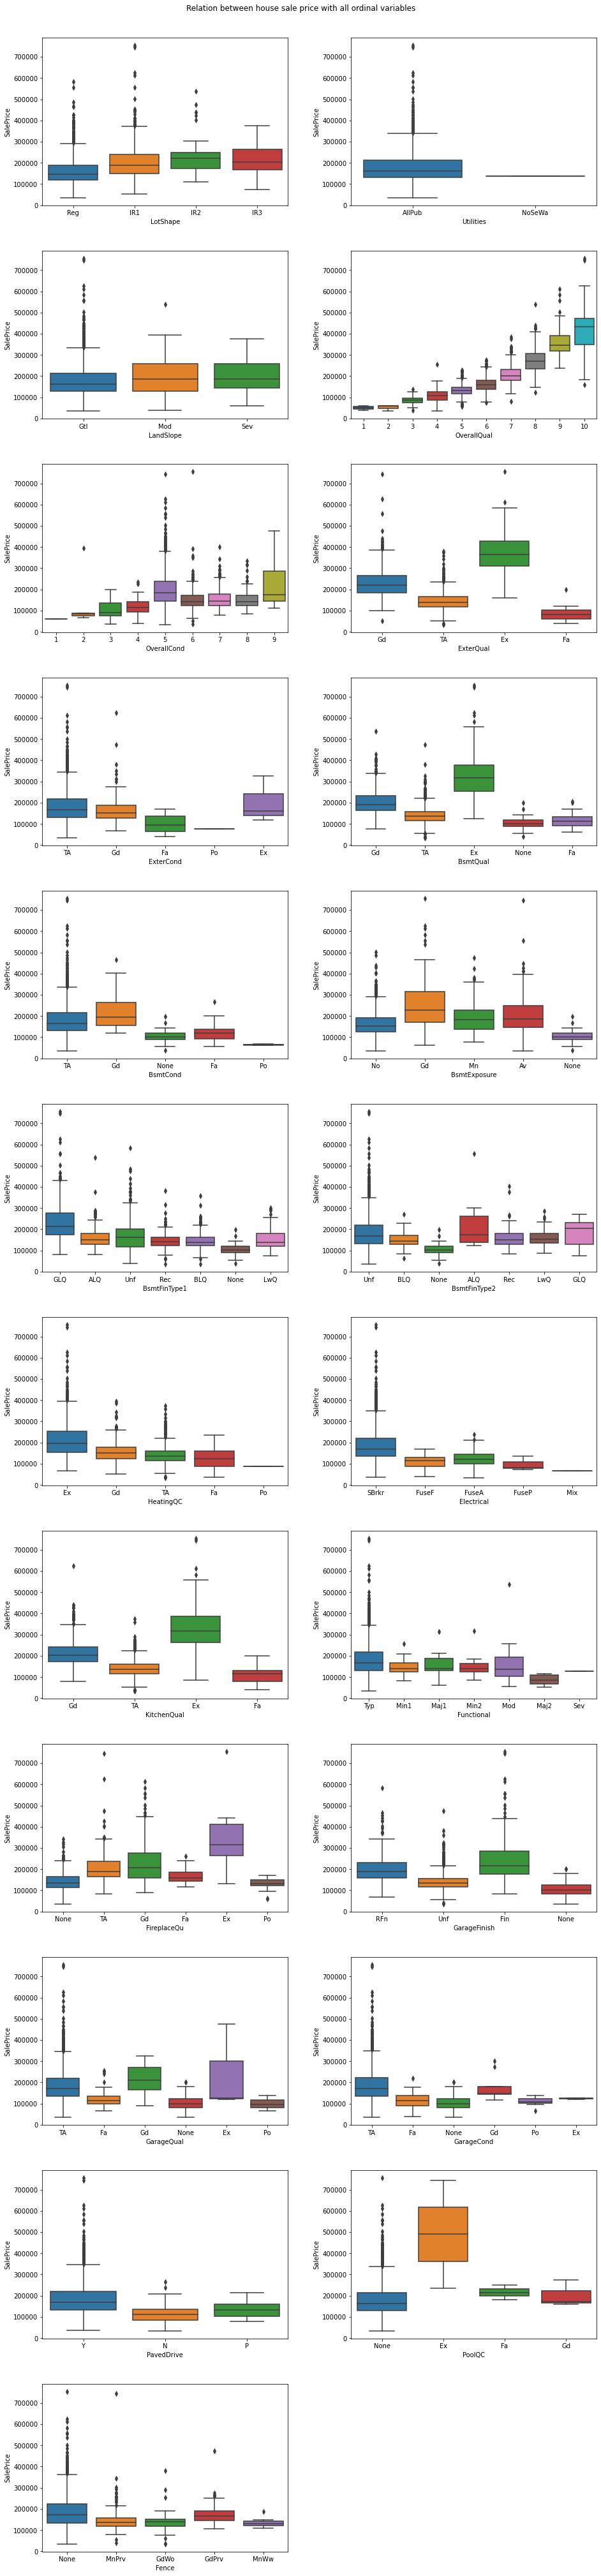

In [9]:
cols = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',  'BsmtQual', 'BsmtCond', 
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
fig = plt.figure(figsize=(14,57))
for c,i in zip(cols, range(1,24)):
    ax = fig.add_subplot(12,2,i)
    sns.boxplot(x=c,y='SalePrice',data=df)
fig.suptitle('Relation between house sale price with all ordinal variables', y=0.99)
fig.tight_layout(pad=4.0)

Several remarks:
- Most of the properties have all public utilities (electricity, gas, water, and septic tank).
- Clearly, overall quality score of the property reflects the sale price (higher score means more expensive).
- Properties with excellent exterior material quality are more expensive than the others.
- Properties with excellent basement heights (100+ inches) are more expensive than the others.
- Properties with excellent kitchen quality are more expensive than the others.
- It seems that properties with excellent fireplac quality to have higher sale price.
- Properties with finished excellent quality garage tend to have higher sale price.
- Properties with excellent pool quality are more expensive than the others.

### Sale price dependence on discrete numerical features

Next, we will examine the relation between the property sale price with all of the discrete numerical features. This can be achieved by using boxplot or scatterplot. We will use the scatterplot for YearBuilt, YearRemodAdd, and GarageYrBlt for much easier interpretation.

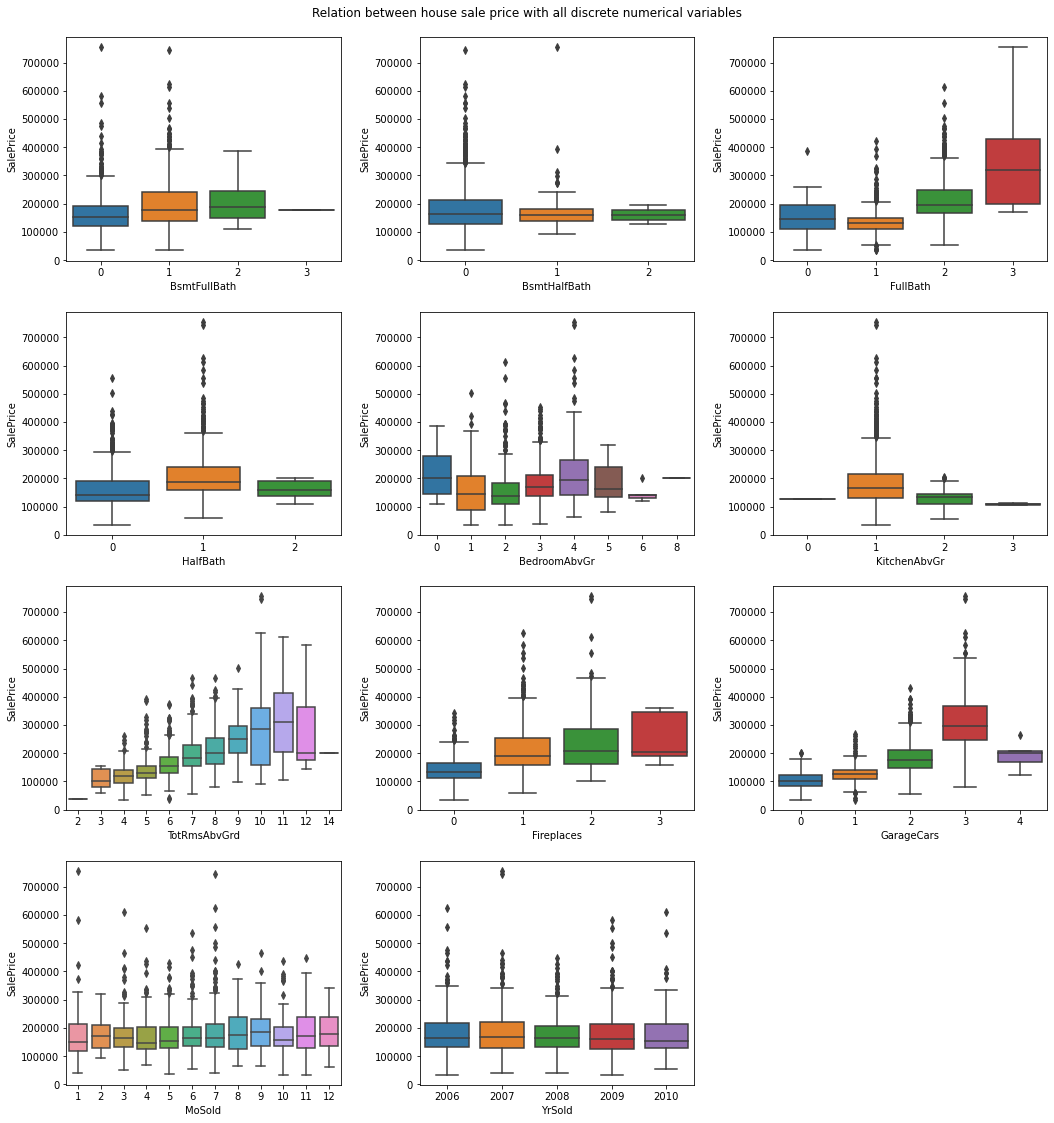

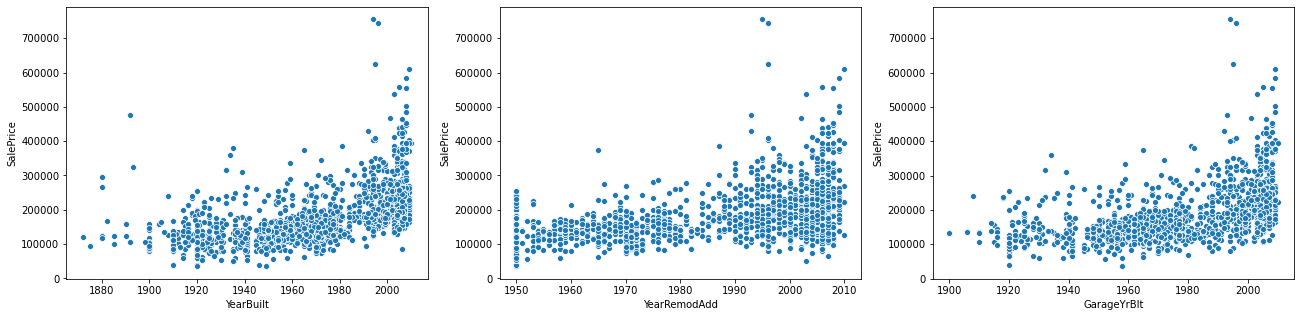

In [46]:
cols1 = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
         'GarageCars', 'MoSold', 'YrSold']
cols2 = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
fig = plt.figure(figsize=(15,16))
for c,i in zip(cols1, range(1,12)):
    ax = fig.add_subplot(4,3,i)
    sns.boxplot(x=c,y='SalePrice',data=df)
fig.suptitle('Relation between house sale price with all discrete numerical variables', y=0.98)
fig.tight_layout(pad=2.0)
fig = plt.figure(figsize=(22,5))
for c,i in zip(cols2, range(1,4)):
    ax = fig.add_subplot(1,3,i)
    sns.scatterplot(x=c,y='SalePrice',data=df)

Several remarks:
- Properties with more full bathrooms above grade tend to have higher sale price.
- Properties with one half bathroom above grade are more expensive than the others.
- Having more rooms in a property (total rooms except bathrooms) tend to increase its sale price. However, if it has too many rooms (>10), the price will decrease. 
- Properties with more fireplaces tend to have higher sale price.
- Large garage capacity (how many cars can be parked) tend to increase the sale price of the property as long as the capacity is under 3 cars. 

### Sale price dependence on continuous numerical features

Next, we will examine the relation between the property sale price with all of the continuous numerical features by using scatterplot.

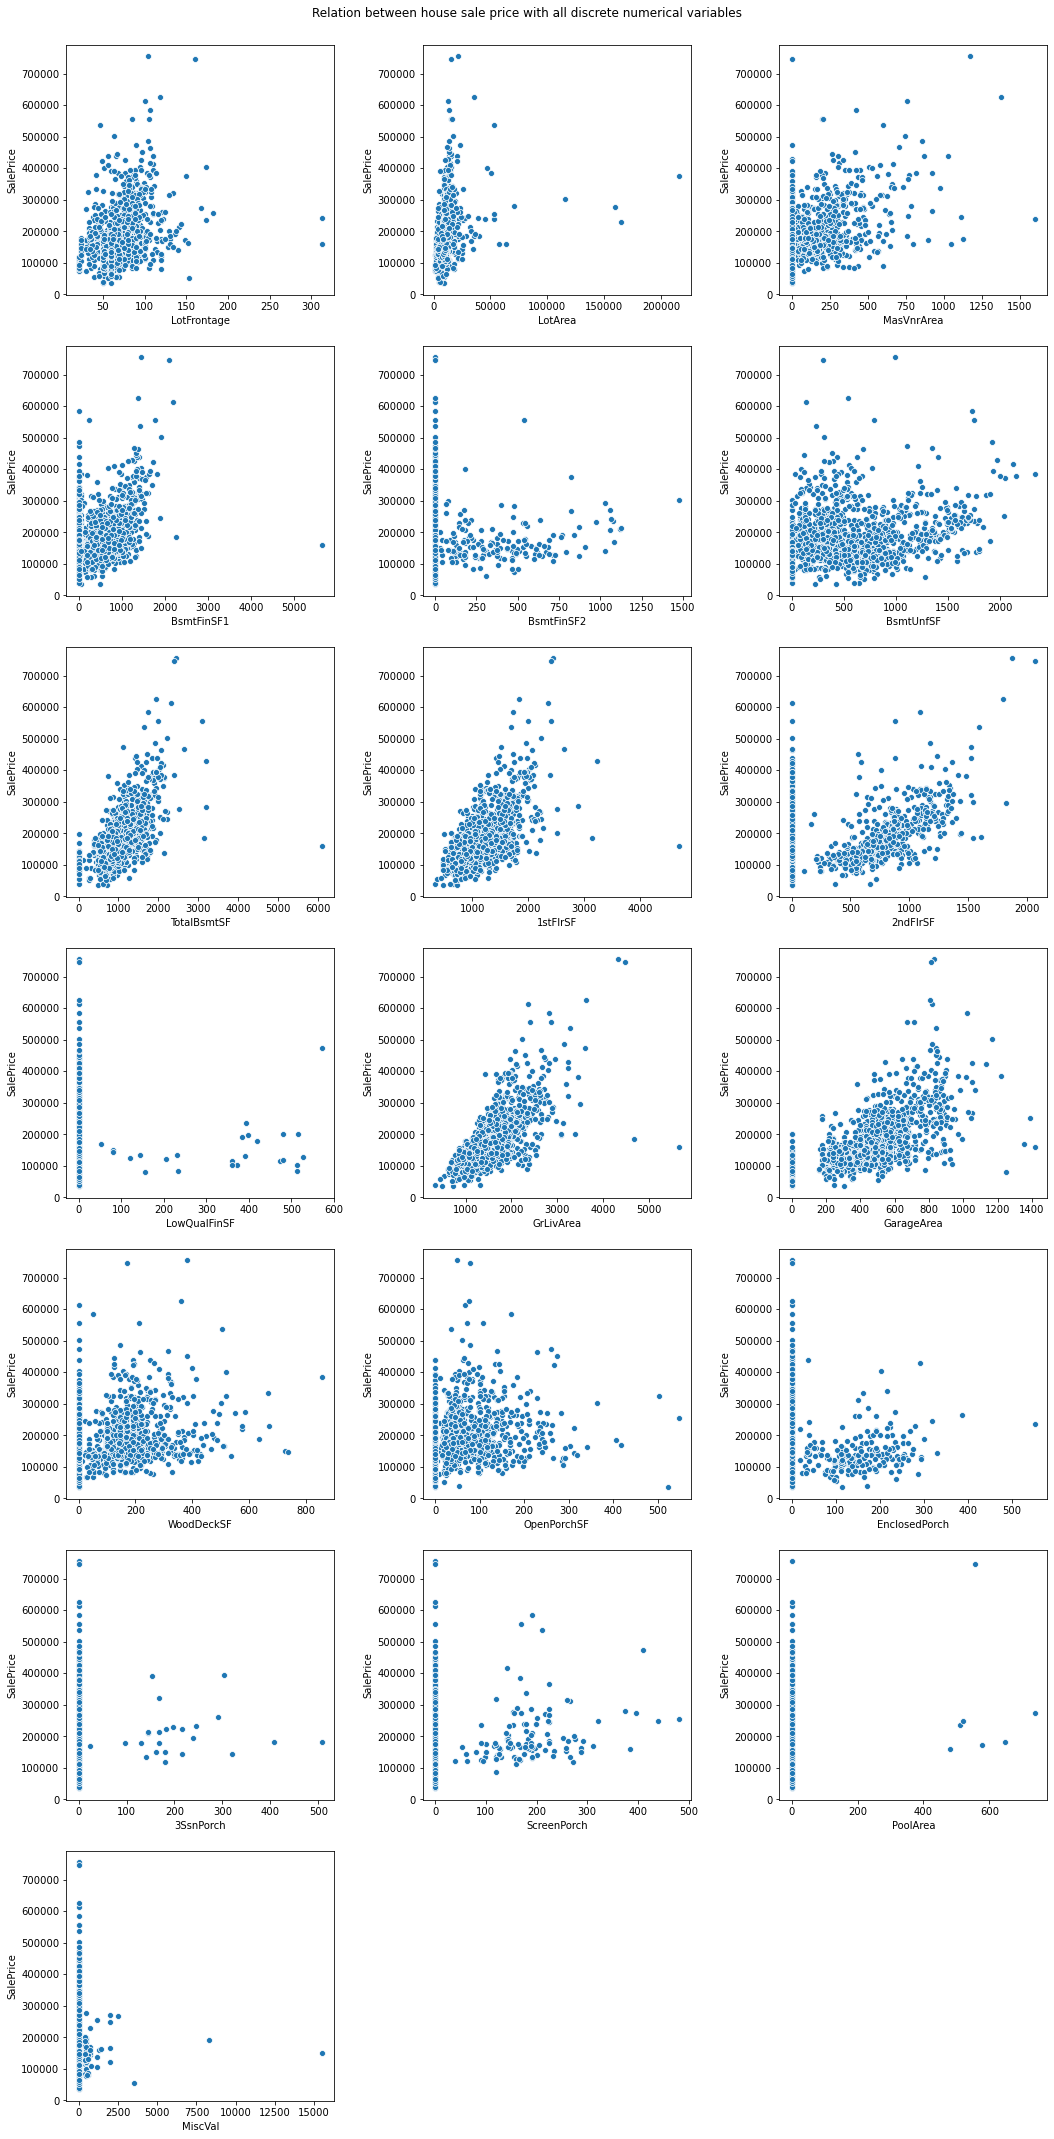

In [69]:
cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
        'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
        'PoolArea', 'MiscVal']
fig = plt.figure(figsize=(15,30))
for c,i in zip(cols, range(1,20)):
    ax = fig.add_subplot(7,3,i)
    sns.scatterplot(x=c,y='SalePrice',data=df)
fig.suptitle('Relation between house sale price with all discrete numerical variables', y=0.993)
fig.tight_layout(pad=2.0)

Several remarks:
- Properties with larger total basement area are more expensive than the smaller ones.
- Properties with larger first floor area tend to have higher sale price, also quite true for second floor area.
- Clearly, above ground living area reflects the sale price of the properties (larger area means higher price).
- Properties with larger garage area are more expensive than the smaller ones.
- It seems that properties with large wood deck and open porch area tend to have higher sale price.

### Relation between several variables

Lastly, we will try to find relation between several features (mostly numeric) by using correlation heatmap. Here, Pearson correlation coefficients are calculated for every pair of numerical features. 

Note: double click the figure to zoom it.

<AxesSubplot:>

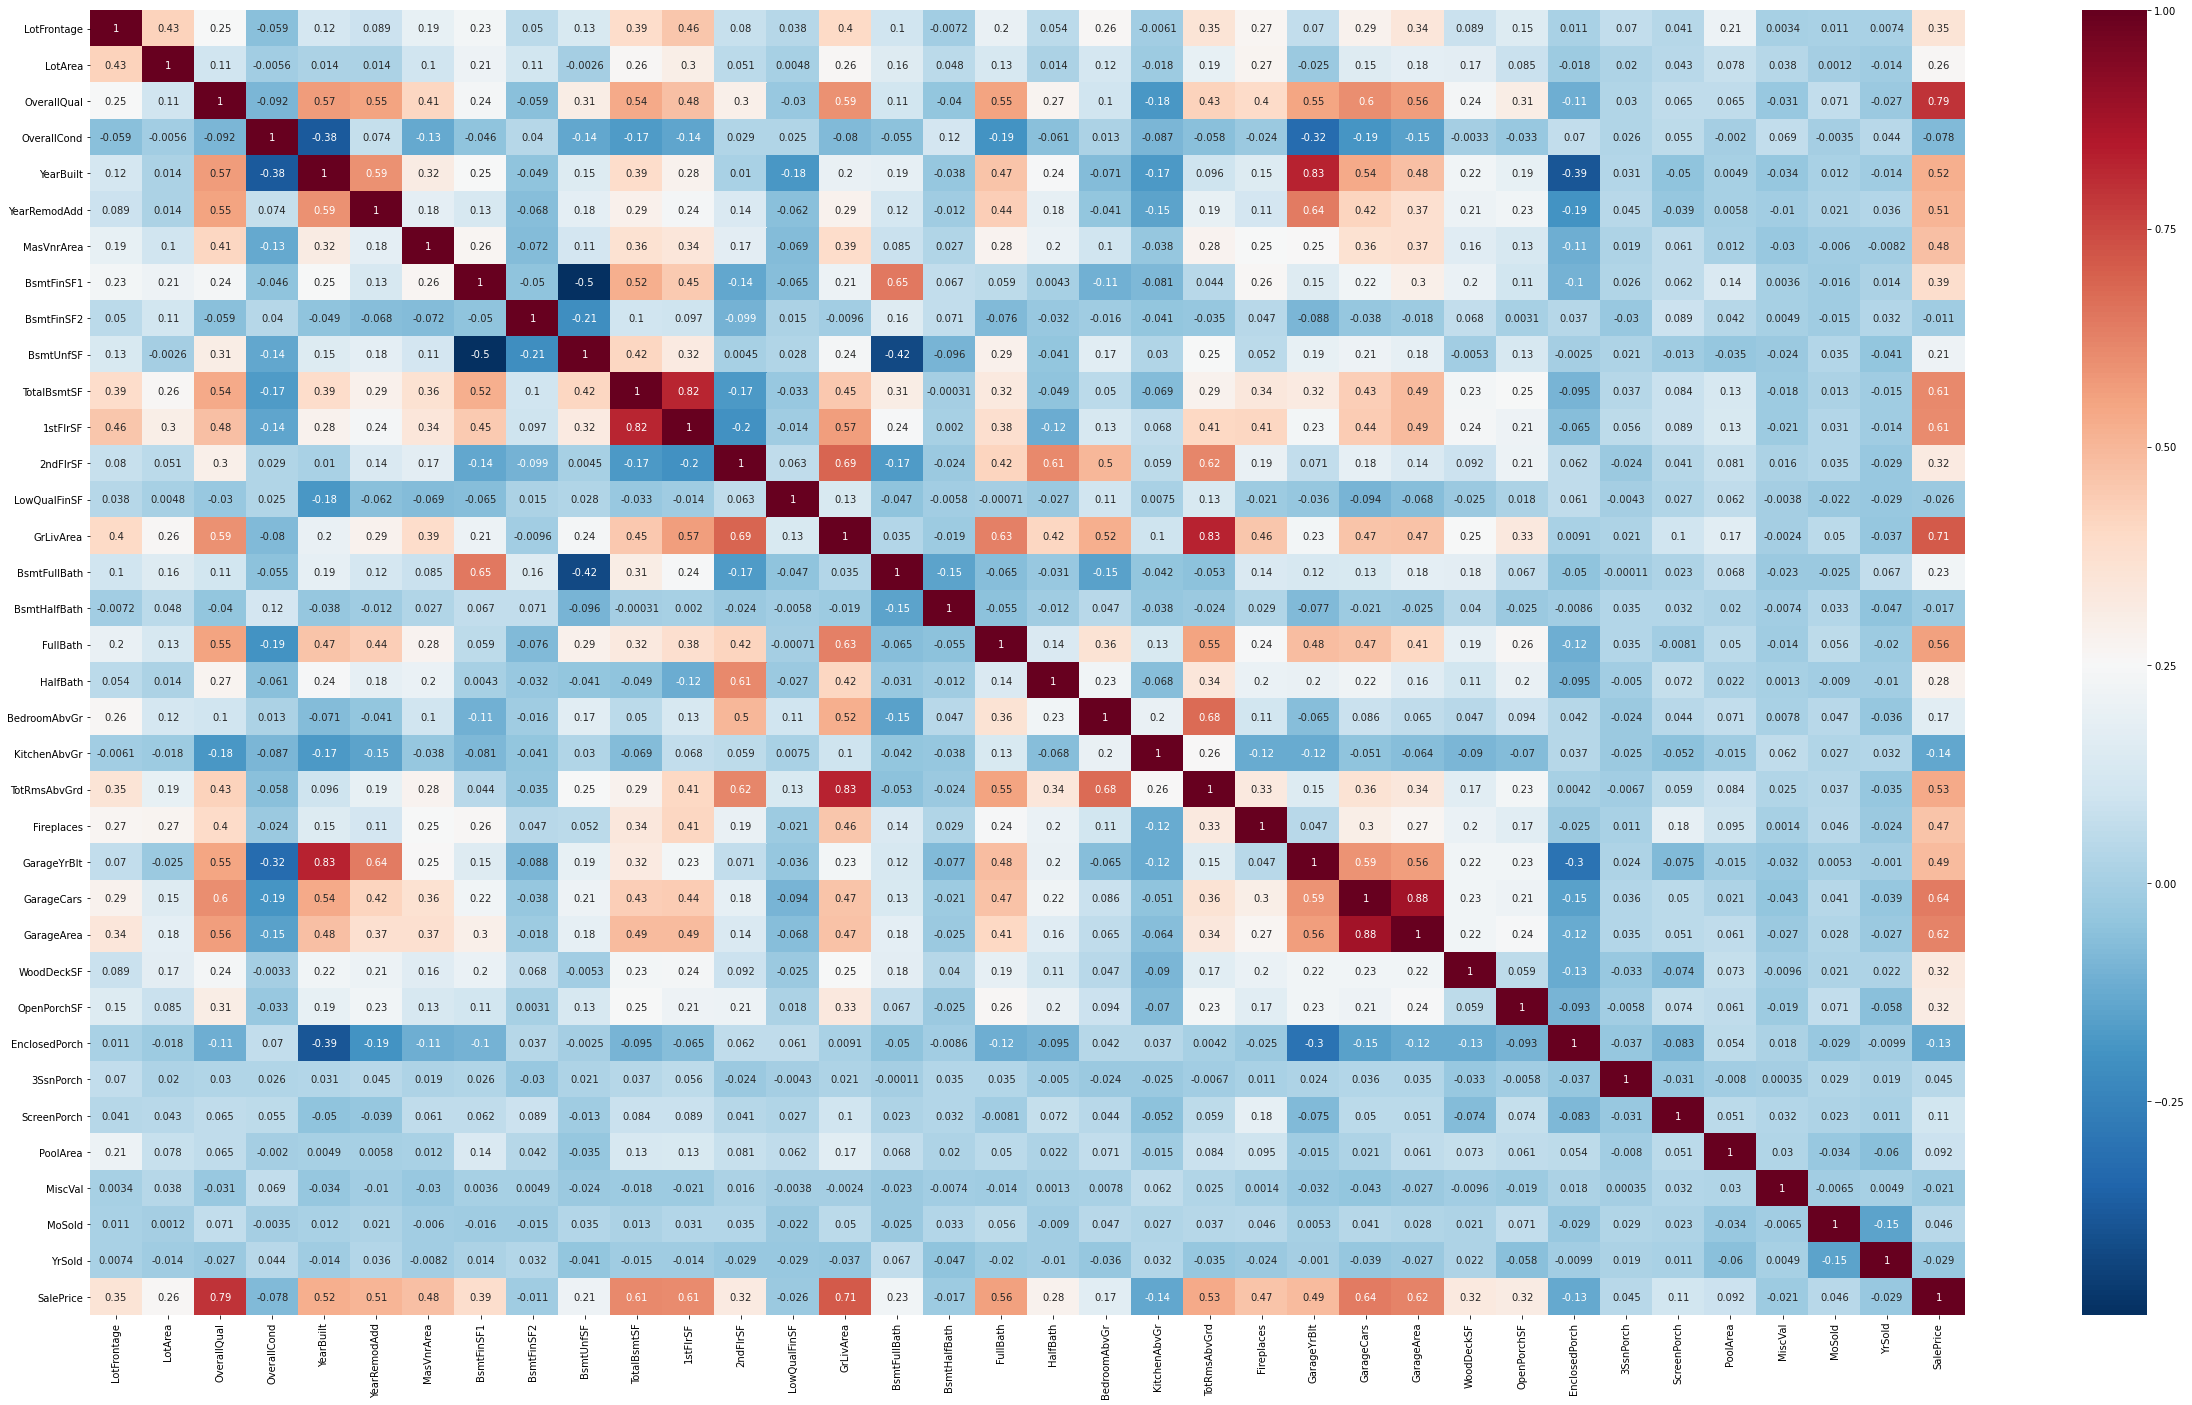

In [70]:
plt.rcParams['figure.figsize'] = [42, 24]
sns.heatmap(df.drop(columns=['Id','MSSubClass']).corr(method='pearson'),annot=True,cmap='RdBu_r')

Some feautres have high correlation with other features:
- GarageArea and GarageCars &#8594; clearly, larger garage will have more car capacity.
- GrLivArea and TotRmsAbvGrd &#8594; clearly, larger living area tend to have more rooms.
- GarageYrBlt and YearBuilt &#8594; it is likely that the house and its garage were built in the same year.
- TotalBsmtSF and 1stFlrSF &#8594; house with large first floor area tend to have large basement area.
- SalePrice has high correlation (>0.7) with OverallQual and GrLivArea &#8594; very important factors!

Let's plot some of these relations.

<AxesSubplot:xlabel='1stFlrSF', ylabel='TotalBsmtSF'>

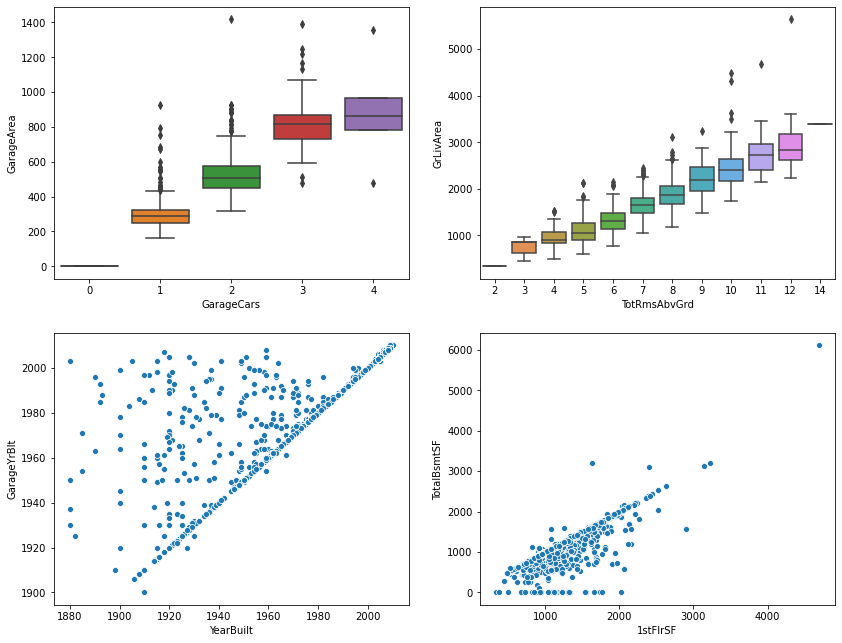

In [88]:
fig = plt.figure(figsize=(14,11))
fig.add_subplot(2,2,1)
sns.boxplot(x='GarageCars',y='GarageArea',data=df)
fig.add_subplot(2,2,2)
sns.boxplot(x='TotRmsAbvGrd',y='GrLivArea',data=df)
fig.add_subplot(2,2,3)
sns.scatterplot(x='YearBuilt',y='GarageYrBlt',data=df)
fig.add_subplot(2,2,4)
sns.scatterplot(x='1stFlrSF',y='TotalBsmtSF',data=df)

### Outliers out there...

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

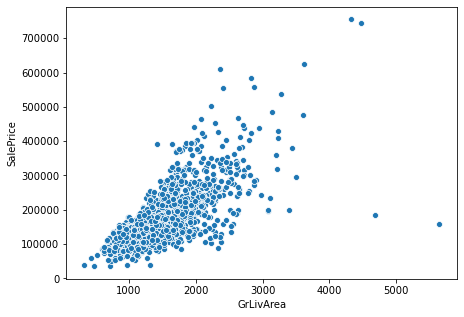

In [89]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

Scatterplot between SalePrice and GrLivArea indicates that there are at least 4 outliers: 2 very large houses with not so expensive prices and 2 large houses with unusually high prices. These houses have GrLivArea > 4000. The author of this project recommends to not use any records with more than 4000 square feet from the dataset (https://amstat.tandfonline.com/doi/pdf/10.1080/10691898.2011.11889627?needAccess=true).

In [5]:
df = df[df['GrLivArea']<4000]

## Handling Missing Values (Continued...)

We are not done yet. The remaining NA values must be handled.

In [6]:
nas = df.isna().sum()
nas[nas>0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

There are only 1 NA values in Electrical column which is a categorical variable hence we can 'safely' fill them with the most frequent value of the column.

In [7]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.loc[:,'Electrical'] = imp.fit_transform(np.array(df['Electrical']).reshape(-1,1))

For MasVnrType column, it is most likely that NA values means that the properties has no masonry veneer walls ('None'). This also means that the masonry veneer area is zero. 

In [8]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

Now for the GarageYrBlt. Because this column is actually a numerical feature and has NA values (which means no garage), the NA values can't be filled with 'None'. They must be filled with numerical values too. To deal with this, we recall that GarageYrBlt has high correlation with YearBuilt (0.83), meaning that the house and its garage were likely built in the same year. Hence, we will fill the NA values with the YearBuilt values, even though the house actually has no garage.

In [9]:
df.loc[df['GarageYrBlt'].isna(),'GarageYrBlt'] = df.loc[df['GarageYrBlt'].isna(),'YearBuilt']

For LotFrontage, it seems that we have no clue. Referring to the correlation heatmap figure, we have no features that highly correlated with LotFrontage. So, let's just simply fill the NA values with zeroes. 

Note: the reason to choose this action is based on Kaggle discussion here https://www.kaggle.com/ogakulov/lotfrontage-fill-in-missing-values-house-prices) 

In [10]:
df.loc[df['LotFrontage'].isna(),'LotFrontage'] = 0

Finally, all of the NA values have been handled.

In [11]:
nas = df.isna().sum()
nas[nas>0]

Series([], dtype: int64)

## Data Preparation

Before building the predictive model, training data must be prepared with several modification: 
- The values of all ordinal features must be manually encoded into integer so it can represent the order/ranking/degree of the feature.
- Nominal columns must be encoded into dummy variables because sklearn package cannot handle string categorical data. For regression problems, one hot encoding is most suitable.
- Id column is not needed for modelling purpose (unique value for each record) so we can drop it.

In [12]:
#encoding ordinal features
df = df.replace({'LotShape' : {'Reg' : 0, 'IR1' : 1, 'IR2' : 2, 'IR3' : 3},
                'Utilities' : {'AllPub' : 4, 'NoSewr' : 3, 'NoSeWa' : 2, 'ELO' : 1},
                'LandSlope' : {'Gtl' : 1, 'Mod' : 2, 'Sev' : 3},
                'ExterQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'ExterCond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'BsmtQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'BsmtCond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'BsmtExposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'None' : 0},
                'BsmtFinType1' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'None' : 0},
                'BsmtFinType2' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'None' : 0},
                'HeatingQC' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Electrical' : {'SBrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1},
                'KitchenQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Functional' : {'Typ' : 8, 'Min1' : 7, 'Min2' : 6, 'Mod' : 5, 'Maj1' : 4, 'Maj2' : 3, 'Sev' : 2, 'Sal' : 1},
                'FireplaceQu' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'GarageFinish' : {'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'None' : 0},
                'GarageQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'GarageCond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'PavedDrive' : {'Y' : 2, 'P' : 1, 'N' : 0},
                'PoolQC' : {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'None' : 0},
                'Fence' : {'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1, 'None' : 0},
                })

In [13]:
#encoding nominal features
df2 = pd.concat([df,pd.get_dummies(df['MSSubClass'],prefix='SubClass',drop_first=True)],axis=1)
df3 = pd.concat([df2,pd.get_dummies(df2[['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood',
                                        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                        'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
                                        'GarageType','MiscFeature','SaleType','SaleCondition']],drop_first=True)],axis=1)
df4 = df3.drop(columns=['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood',
                                        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                        'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
                                        'GarageType','MiscFeature','SaleType','SaleCondition'])

In [14]:
#drop Id column
data = df4.drop(columns='Id')
data

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,0,4,1,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0,4,1,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,1,4,1,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1,4,1,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,1,4,1,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0,4,1,6,5,1999,2000,0.0,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,0,4,1,6,6,1978,1988,119.0,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,0,4,1,7,9,1941,2006,0.0,...,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,0,4,1,5,6,1950,1996,0.0,...,0,0,0,0,1,0,0,0,1,0


## Building Predictive Model

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']

### Metric for evaluating model

The metric used for evaluating the models is root-mean-squared logarithmic error (RMSLE) between actual and predicted value. Taking the logarithmic value is necessary to compensate high difference values when dealing with expensive houses. For this metric, lower value means better score.

In [16]:
from sklearn.metrics import mean_squared_log_error, make_scorer

def funct(y_true,y_pred):
    y_new = np.maximum(y_pred,np.zeros(len(y_pred)))
    t = mean_squared_log_error(y_true,y_new)
    return np.sqrt(t)

RMSLE = make_scorer(funct, greater_is_better=False)

###  Predictive model: linear regression with regularization

For the first model, we will use linear regression with regularization. Before fitting data with the proposed model, it is certainly wise to perform feature selection due to high number of features.

In [18]:
print('Number of features: %d' %(len(X.columns)))

Number of features: 211


Using all features will be redundant because not all of them have significant relation with the sale price. We will try to select important features using SelectKBest from sklearn package.

Text(0.5, 1.0, 'Feature importances based on regression')

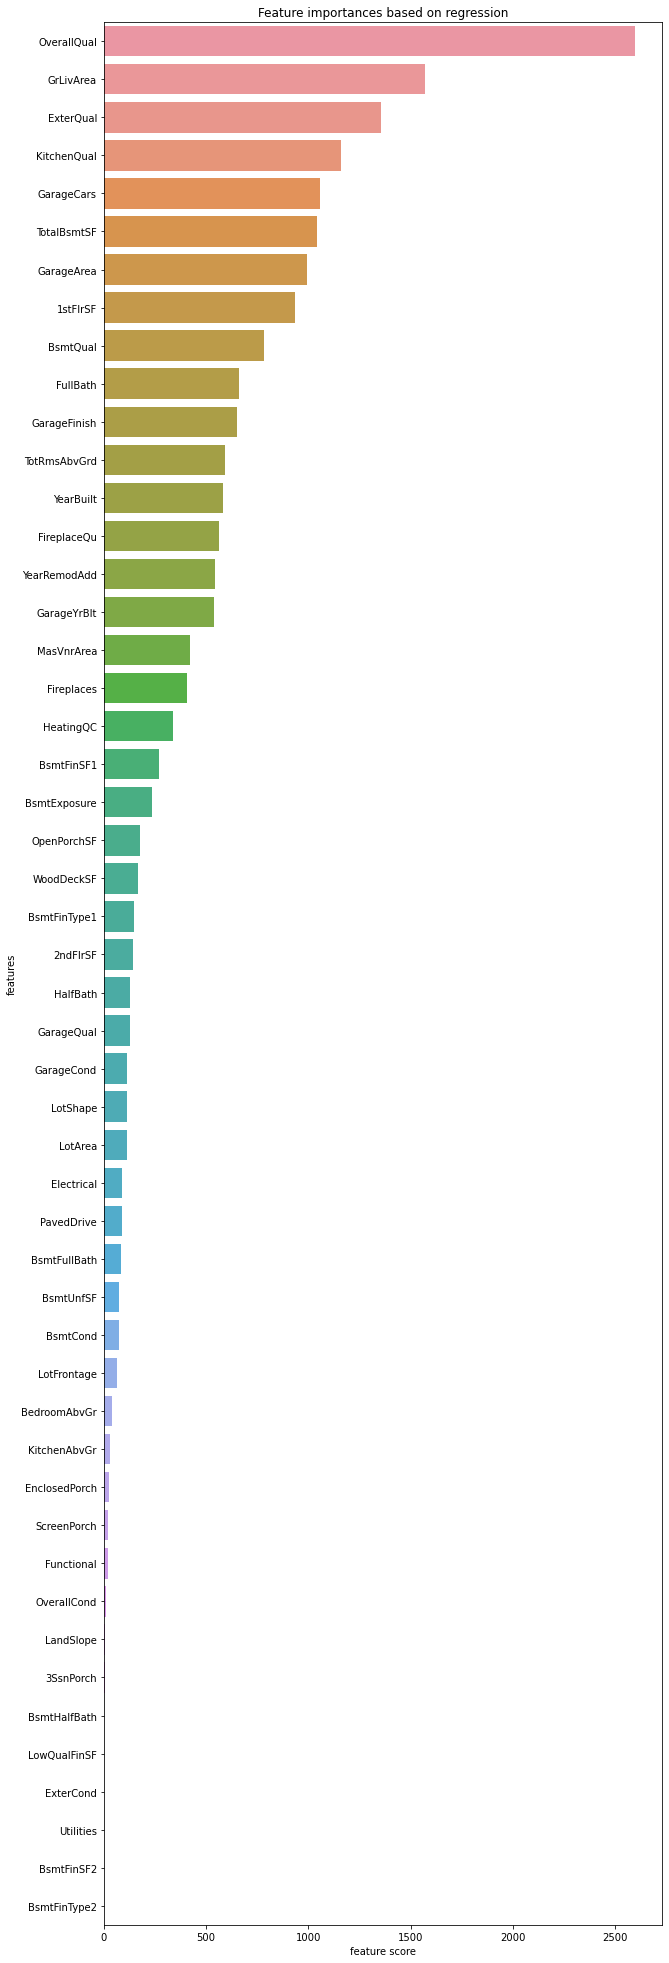

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X,y)
indices = np.argsort(fs.scores_)[::-1]
cc = DataFrame({'feature score':Series(fs.scores_),'features':Series(X.columns)})    
plt.figure(figsize=(10,35))
sns.barplot(x='feature score',y='features',data=cc.head(50).sort_values(by='feature score',ascending=False))
plt.title('Feature importances based on regression')

As we can see, several features have high importance score such as OverallQual, GrLivArea, KitchenQual, GarageCars, TotalBsmtSF and so on (also confirmed by plotting the relations), while other features have nearly zero importance score. We will take 100 features with high importance score for our selected features.

In [43]:
new_col = np.array(Series(X.columns[indices]).head(100))
X_new1 = X[new_col]

Now we can proceed to modelling step. We will use linear least squares regression with L2 regularization (also known as Ridge regression) from sklearn package. Feature scaling is needed for this regressor and we will use StandardScaler. Hyperparameter tuning was done using grid search + cross validation method.

In [44]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", StandardScaler()),("reg", Ridge())])
param_grid = {'reg__alpha': [630, 640, 650, 680, 700]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring=RMSLE)
grid.fit(X_new1,y)
print('Best hyperparameter: ', grid.best_params_)
print('Best cross validation score: ', -grid.best_score_)

Best hyperparameter:  {'reg__alpha': 630}
Best cross validation score:  0.14111415956180226


For Ridge regressor, our best RMSLE score in cross validation scheme is 0.1411 with hyperparameter alpha = 630. Also shown here the line plot between predicted and actual value of the sale price. It can be seen that our model fail to predict correctly  properties with expensive sale price. 

Text(0, 0.5, 'SalePrice (predicted)')

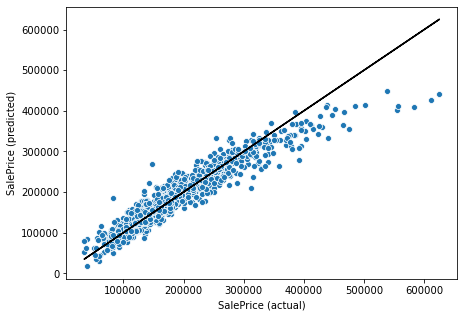

In [45]:
y_true = y
y_pred = grid.predict(X_new1)
plt.figure(figsize=(7,5))
sns.scatterplot(y_true,y_pred)
plt.plot(y_true,y_true,color='k')
plt.xlabel('SalePrice (actual)')
plt.ylabel('SalePrice (predicted)')

###  Predictive model: extremely randomized tree (Extra Trees) regressor

Before training the data using tree regressor, again we perform feature selection. This can easily be done because ExtraTreesRegressor provide straightforward method for feature selection by calculating feature importances.

<AxesSubplot:xlabel='feature score', ylabel='features'>

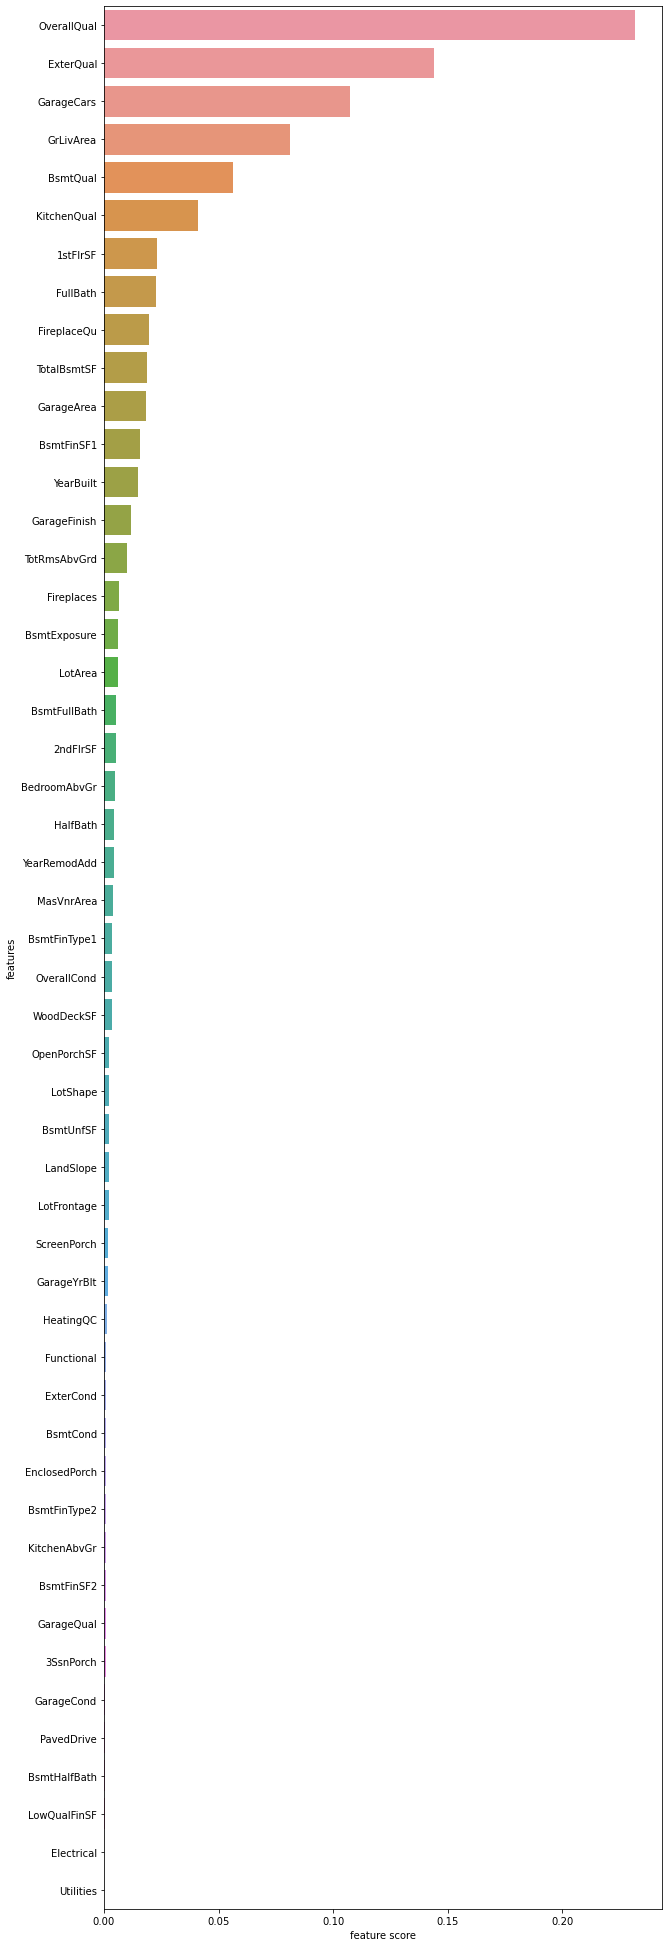

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor(n_estimators=100,
                              random_state=0,n_jobs=4)
forest.fit(X, y)
indices = np.argsort(forest.feature_importances_)[::-1]
cc = DataFrame({'feature score':Series(forest.feature_importances_),'features':Series(X.columns)})    
plt.figure(figsize=(10,35))
sns.barplot(x='feature score',y='features',data=cc.head(50).sort_values(by='feature score',ascending=False))

Several features which have high importance score are in accordance to the previous result using SelectKBest. We will take 100 features with high importance score for our selected features.

In [47]:
new_col = np.array(Series(X.columns[indices]).head(100))
X_new2 = X[new_col]

Next, we begin to train the data using Extra Trees Regressor from sklearn package. Feature scaling is not necessarily needed for tree regressor. Hyperparameter tuning was done using grid search + cross validation method.

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor(random_state=0,n_jobs=4,n_estimators=500)
param_grid = {'min_samples_split': [2, 3, 4], 'max_depth' : [40, 50]}
grid = GridSearchCV(forest, param_grid=param_grid, cv=5, scoring=RMSLE)
grid.fit(X_new2,y)
print('Best hyperparameter: ', grid.best_params_)
print('Best cross validation score: ', -grid.best_score_)

Best hyperparameter:  {'max_depth': 40, 'min_samples_split': 3}
Best cross validation score:  0.13316751696742496


For Extra Trees Regressor, our best RMSLE score in cross validation scheme is 0.1332 (5.5% better than Ridge regression) with hyperparameters min_samples_split = 3 and max_depth = 40. Also shown here the line plot between predicted and actual value of the sale price. It can be seen that our model almost capable to capture all of the properties sale price. Unfortunately, the cross validation score reveals that our model is overfitting the data.

Text(0, 0.5, 'SalePrice (predicted)')

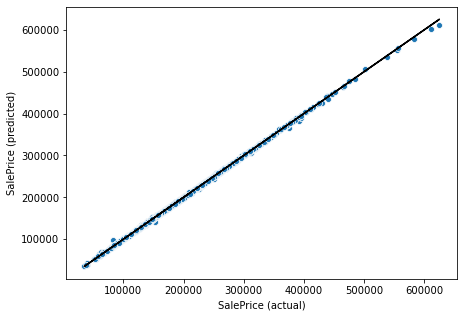

In [49]:
y_true = y
y_pred = grid.predict(X_new2)
plt.figure(figsize=(7,5))
sns.scatterplot(y_true,y_pred)
plt.plot(y_true,y_true,color='k')
plt.xlabel('SalePrice (actual)')
plt.ylabel('SalePrice (predicted)')

### Predictive model: gradient boosting regressor

Again, before training the data with gradient boosting, we will perform feature selection. This can easily be done because GradientBoostingRegressor provide straightforward method for feature selection by calculating feature importances.

<AxesSubplot:xlabel='feature score', ylabel='features'>

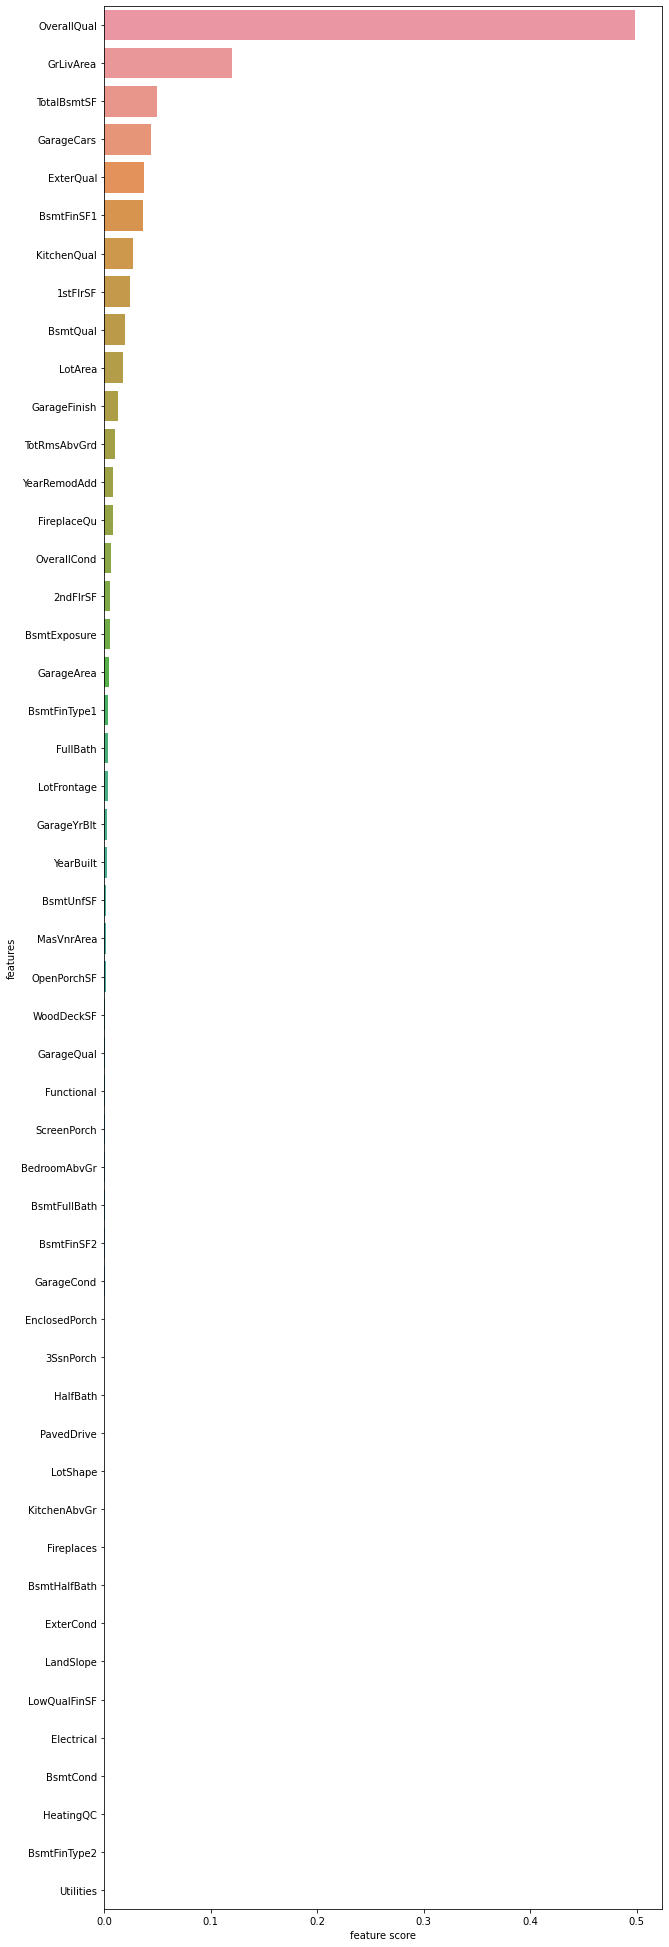

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gdb = GradientBoostingRegressor(n_estimators = 300, random_state=0)
gdb.fit(X,y)
indices = np.argsort(gdb.feature_importances_)[::-1]
cc = DataFrame({'feature score':Series(gdb.feature_importances_),'features':Series(X.columns)})    
plt.figure(figsize=(10,35))
sns.barplot(x='feature score',y='features',data=cc.head(50).sort_values(by='feature score',ascending=False))

Several features which have high importance score are in accordance to the previous results using SelectKBest and ExtraTreesRegressor feature importance. We will take 100 features with high importance score for our selected features.

In [19]:
new_col = np.array(Series(X.columns[indices]).head(100))
X_new3 = X[new_col]

Next, we begin to train the data using Gradient Boosting Regressor from sklearn package. Feature scaling is not necessarily needed for this regressor because basically gradient boosting is a tree regressor. Hyperparameter tuning was done using grid search + cross validation method.

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gdb = GradientBoostingRegressor(random_state=0, n_estimators=400)
param_grid = {'min_samples_split' : [25, 30, 35], 'min_samples_leaf' : [2, 3]}
grid = GridSearchCV(gdb, param_grid=param_grid, cv=5, scoring=RMSLE)
grid.fit(X_new3,y)
print('Best hyperparameter: ', grid.best_params_)
print('Best cross validation score: ', -grid.best_score_)

Best hyperparameter:  {'min_samples_leaf': 3, 'min_samples_split': 25}
Best cross validation score:  0.1200375833565102


For Gradient Boosting regressor, our best RMSLE score in cross validation scheme is 0.1200 (9.9% better than Extra Trees) with hyperparameters min_samples_leaf = 3 and min_samples_split = 25. Also shown here the line plot between predicted and actual value of the sale price. It can be seen that our model almost capable to capture all of the properties sale price, although the cross validation score reveals that our model is quietly overfitting the data.

Text(0, 0.5, 'SalePrice (predicted)')

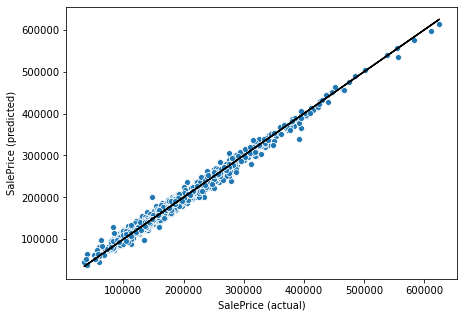

In [53]:
y_true = y
y_pred = grid.predict(X_new3)
plt.figure(figsize=(7,5))
sns.scatterplot(y_true,y_pred)
plt.plot(y_true,y_true,color='k')
plt.xlabel('SalePrice (actual)')
plt.ylabel('SalePrice (predicted)')

### How about R<sup>2</sup>  score?

Many of us are more familiar with R<sup>2</sup> score in regression problems rather than mean squared error function. Hence, we will provide R<sup>2</sup> score for each model we have built.

In [62]:
from sklearn.metrics import r2_score

#Ridge regression
pipe = Pipeline([("scaler", StandardScaler()),("reg", Ridge(alpha=630))])
score = cross_val_score(pipe, X_new1, y, cv=5, scoring='r2')
print('R\u00b2 score for Ridge regression: %f' %(score.mean()))

#Extra Trees
forest = ExtraTreesRegressor(random_state=0, n_jobs=4, n_estimators=500, max_depth=40, min_samples_split=3)
score = cross_val_score(forest, X_new2, y, cv=5, scoring='r2')
print('R\u00b2 score for Extra Trees: %f' %(score.mean()))

#Gradient Boosting
gdb = GradientBoostingRegressor(random_state=0, n_estimators=400, min_samples_leaf=3, min_samples_split=25)
score = cross_val_score(forest, X_new3, y, cv=5, scoring='r2')
print('R\u00b2 score for Gradient Boosting: %f' %(score.mean()))

R² score for Ridge regression: 0.882502
R² score for Extra Trees: 0.894410
R² score for Gradient Boosting: 0.894592


## Implementing to the Test Data

In [51]:
dt = pd.read_csv('E:\File\Data Science\Projects\House Prices\\test.csv')
dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [27]:
nas = dt.isna().sum()
nas[nas > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

Before we can implement our model, missing values from test data have to be handled in the same manner as in training data:
- Replace NA values with 'None' values in columns: Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.
- Replace NA values in MasVnrArea with zeroes.
- Replace NA values in GarageYrBlt with corresponding YearBuilt values.
- Fill NA values in LotFrontage with zeroes.

Unfortunately, there are more NA valus in another columns: MSZoning, Utilities, Exterior1st, Exterior2nd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, KitchenQual, Functional, SaleType. Also, several properites have contradictive information about basement and garage.

### Fill with other categorical variable

- Replace NA values with 'None' in categorical columns without contradiction.
- For SaleType column, it is most likely that NA value means that the property has other type of sale.

In [52]:
cols = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MasVnrType', 'BsmtFinType1', 'BsmtFinType2']
dt[cols] = dt[cols].fillna('None')
dt.loc[dt['SaleType'].isna(),'SaleType'] = 'Oth'

### Fill with zeroes

- Fill NA values in LotFrontage with zeroes.
- Fill NA values in MasVnrArea with zeroes.
- The columns BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, and TotalBsmtSF refer to the basement area. Hence, it is most likely that NA values in those columns are actually zeroes &#8594; no basement area. 
- NA values in BsmtFullBath and BsmtHalfBath might be interpreted as no bathroom in basement &#8594; fill with zeroes.
- NA values in GarageCars and GarageArea certainly indicate that the property has no garage  &#8594; fill with zeroes.

In [53]:
cols = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',
       'GarageCars','GarageArea']
dt[cols] = dt[cols].fillna(0)

### Fill with the most frequent value

Several categorical variables give no clue about the NA values so it is quite difficult to interpret them. These variables are MSZoning, Utilities, Exterior1st, Exterior2nd, KitchenQual, and Functional. The number of NA values in each of these columns are quite few, hence we can 'safely' fill them with the most frequent value for each column.

In [54]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional']
dt[cols] = imp.fit_transform(dt[cols])

### Contradictive information about basement

Two properties have NA values in BsmtQual (which means they have no basement) but other features show that they have basement. 

Strategy &#8594; fill with the most frequent value.

In [39]:
dt[(dt['BsmtQual'].isna()) & (dt['TotalBsmtSF']>0)].iloc[:,30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
757,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA
758,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA


Three properties have NA values in BsmtCond (which means they have no basement) but other features show that they have basement. 

Strategy &#8594; fill with the most frequent value.

In [40]:
dt[(dt['BsmtCond'].isna()) & (dt['TotalBsmtSF']>0)].iloc[:,30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
580,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,GasA
725,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,GasA
1064,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,GasA


Two properties have NA values in BsmtExposure (which means they have no basement) but other features show that they have basement. 

Strategy &#8594; replace with 'No' value (same treatment as in training data).

In [41]:
dt[(dt['BsmtExposure'].isna()) & (dt['TotalBsmtSF']>0)].iloc[:,30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
27,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA
888,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA


In [55]:
dt.loc[(dt['BsmtQual'].isna()) & (dt['TotalBsmtSF']>0),'BsmtQual'] = dt['BsmtQual'].value_counts().idxmax()
dt.loc[(dt['BsmtCond'].isna()) & (dt['TotalBsmtSF']>0),'BsmtCond'] = dt['BsmtCond'].value_counts().idxmax()
dt.loc[(dt['BsmtExposure'].isna()) & (dt['TotalBsmtSF']>0),'BsmtExposure'] = 'No'
cols = ['BsmtQual','BsmtCond','BsmtExposure']
dt[cols] = dt[cols].fillna('None')

### Contradictive information about garage

One property has NA values in GarageYrBlt, GarageFinish, GarageQual, and GarageCond (which means it has no garage) but other features show that it has a garage. 

Strategy &#8594; fill GarageFinish with 'Unf' value (interpret it as unfinished garage).

Strategy &#8594; fill GarageQual and GarageCond with the most frequent value.

In [43]:
dt[(dt['GarageFinish'].isna()) & (dt['GarageArea']>0)].iloc[:,57:67]

,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF
666,None,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64


One property has GarageType of Detchd, but other features show that it has no garage.

Strategy &#8594; it is most likely a typo so replace 'Detchd' value with 'None' value.

In [44]:
dt[(~dt['GarageType'].isna()) & (dt['GarageArea'] == 0)].iloc[:,57:67]

,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF
1116,None,Detchd,NaN,NaN,0.0,0.0,NaN,NaN,Y,174


For GarageYrBlt, replace the NA values with the corresponding YearBuilt values (same treatment as in training data).

In [56]:
dt.loc[(dt['GarageFinish'].isna()) & (dt['GarageArea']>0),'GarageFinish'] = 'Unf'
dt.loc[(dt['GarageQual'].isna()) & (dt['GarageArea']>0),'GarageQual'] = dt['GarageQual'].value_counts().idxmax()
dt.loc[(dt['GarageCond'].isna()) & (dt['GarageArea']>0),'GarageCond'] = dt['GarageCond'].value_counts().idxmax()
dt.loc[(~dt['GarageType'].isna()) & (dt['GarageArea'] == 0),'GarageType'] = 'None'
cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
dt[cols] = dt[cols].fillna('None')
dt.loc[dt['GarageYrBlt'].isna(),'GarageYrBlt'] = dt.loc[dt['GarageYrBlt'].isna(),'YearBuilt']

In [57]:
nas = dt.isna().sum()
nas[nas > 0]

Series([], dtype: int64)

### Preparing and testing

Before applying our best model, test data must be prepared in a proper form:
- The values of all ordinal features must be manually encoded into integer.
- Nominal columns must be encoded into dummy variables (one hot encoding).

In [58]:
#encoding ordinal features
dtt = dt.replace({'LotShape' : {'Reg' : 0, 'IR1' : 1, 'IR2' : 2, 'IR3' : 3},
                'Utilities' : {'AllPub' : 4, 'NoSewr' : 3, 'NoSeWa' : 2, 'ELO' : 1},
                'LandSlope' : {'Gtl' : 1, 'Mod' : 2, 'Sev' : 3},
                'ExterQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'ExterCond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'BsmtQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'BsmtCond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'BsmtExposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'None' : 0},
                'BsmtFinType1' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'None' : 0},
                'BsmtFinType2' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'None' : 0},
                'HeatingQC' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Electrical' : {'SBrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1},
                'KitchenQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Functional' : {'Typ' : 8, 'Min1' : 7, 'Min2' : 6, 'Mod' : 5, 'Maj1' : 4, 'Maj2' : 3, 'Sev' : 2, 'Sal' : 1},
                'FireplaceQu' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'GarageFinish' : {'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'None' : 0},
                'GarageQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'GarageCond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'PavedDrive' : {'Y' : 2, 'P' : 1, 'N' : 0},
                'PoolQC' : {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'None' : 0},
                'Fence' : {'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1, 'None' : 0},
                })

In [59]:
#encoding nominal features
dt2 = pd.concat([dtt,pd.get_dummies(dtt['MSSubClass'],prefix='SubClass',drop_first=True)],axis=1)
dt3 = pd.concat([dt2,pd.get_dummies(dt2[['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood',
                                        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                        'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
                                        'GarageType','MiscFeature','SaleType','SaleCondition']],drop_first=True)],axis=1)
dt4 = dt3.drop(columns=['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood',
                                        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                        'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
                                        'GarageType','MiscFeature','SaleType','SaleCondition'])
dt4['Exterior1st_Stone'] = np.zeros(len(dt4))
dt4

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Exterior1st_Stone
0,1461,80.0,11622,0,4,1,5,6,1961,1961,...,0,0,0,1,0,0,0,1,0,0.0
1,1462,81.0,14267,1,4,1,6,6,1958,1958,...,0,0,0,1,0,0,0,1,0,0.0
2,1463,74.0,13830,1,4,1,5,5,1997,1998,...,0,0,0,1,0,0,0,1,0,0.0
3,1464,78.0,9978,1,4,1,6,6,1998,1998,...,0,0,0,1,0,0,0,1,0,0.0
4,1465,43.0,5005,1,4,1,8,5,1992,1992,...,0,0,0,1,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,0,4,1,4,7,1970,1970,...,0,0,0,1,0,0,0,1,0,0.0
1455,2916,21.0,1894,0,4,1,4,5,1970,1970,...,0,0,0,1,0,0,0,0,0,0.0
1456,2917,160.0,20000,0,4,1,5,7,1960,1996,...,0,0,0,1,0,0,0,0,0,0.0
1457,2918,62.0,10441,0,4,1,5,5,1992,1992,...,0,0,0,1,0,0,0,1,0,0.0


Now it's time to implement the predictive model. Based on the model building step, our best model is Gradient Boosting Regressor wih tuned hyperparameters (min_samples_leaf = 3 and min_samples_split = 25). Feature selection also performed to the test data.

In [60]:
X_test = dt4[new_col]
y_pred = grid.predict(X_test)
final = pd.concat([dt, Series(y_pred,name='SalePrice')], axis=1)
final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,6,2010,WD,Normal,121760.165262
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Gar2,12500,6,2010,WD,Normal,161834.003344
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,3,2010,WD,Normal,189164.270330
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,6,2010,WD,Normal,192739.337982
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,0,None,None,None,0,1,2010,WD,Normal,180315.211985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2006,WD,Normal,83857.846253
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2006,WD,Abnorml,83065.275699
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,9,2006,WD,Abnorml,167943.268673
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,700,7,2006,WD,Normal,117324.951100


Finally, we have predicted the sale prices of each property in Ames using our best predictive model based on the training data. The final predicted test data can be exported to CSV file and submitted to Kaggle.

In [61]:
final.to_csv("output_ames.csv") 